In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re

In [3]:
def read_file(file):
    '''Reads Whatsapp text file into a list of strings'''
    x = open(file,'r', encoding = 'utf-8') #Opens the text file into variable x but the variable cannot be explored yet
    y = x.read() #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    return content

chat = read_file('StockMatter.txt')

In [5]:
print(len(chat))
print(chat[0])

919
08/08/2021, 18:13 - Ram Marthi: 👍🙏 wonderful add to the group


In [13]:
import datetime
# Remove elements that are not date
len(chat) #919

for i in range(len(chat)):
  try:
    datetime.datetime.strptime(chat[i].split(',')[0], '%d/%m/%Y') #Converts string date into a date object
  except ValueError: #Returns an error if the string is not a datetime object
    chat[i-1] = chat[i-1] + ' ' + chat[i] #Appends the next line to the previous line
    chat[i] = "NA" #Replace the unwanted text element with 'NA'
    
#Handle more than double-line texting
for i in range(len(chat)):
  if chat[i].split(' ')[0] == 'NA':
    chat[i] = 'NA'
    
while True:
    try:
        chat.remove("NA")
    except ValueError:
        break
        
len(chat) #861

861

In [64]:
print(len(chat))
print(chat[30])

919
Sbi-500 in 2013 now 440


In [6]:
def startsWithDateTime(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [7]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [8]:
def getDataPoint(line):
    # line = 18/06/17, 22:47 - Loki: Why do you have 2 numbers, Banner?
    
    splitLine = line.split(' - ') # splitLine = ['18/06/17, 22:47', 'Loki: Why do you have 2 numbers, Banner?']
    
    dateTime = splitLine[0] # dateTime = '18/06/17, 22:47'
    
    date, time = dateTime.split(', ') # date = '18/06/17'; time = '22:47'
    
    message = ' '.join(splitLine[1:]) # message = 'Loki: Why do you have 2 numbers, Banner?'
    
    if startsWithAuthor(message): # True
        splitMessage = message.split(': ') # splitMessage = ['Loki', 'Why do you have 2 numbers, Banner?']
        author = splitMessage[0] # author = 'Loki'
        message = ' '.join(splitMessage[1:]) # message = 'Why do you have 2 numbers, Banner?'
    else:
        author = None
    return date, time, author, message

In [55]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'MTECH1.txt' 

In [56]:
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file (usually contains information about end-to-end encryption)
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track of the current message being processed
    
    while True:
        line = fp.readline() 
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip() # Guarding against erroneous leading and trailing whitespaces
        if startsWithDateTime(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer


In [57]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
print(df)

            Date   Time           Author  \
0     04/10/2021  12:48             None   
1     07/10/2021  20:03             None   
2     07/10/2021  20:03              Sam   
3     07/10/2021  20:03             None   
4     07/10/2021  20:03             None   
...          ...    ...              ...   
1520  10/10/2021  19:56  +91 98675 31759   
1521  10/10/2021  20:08             None   
1522  10/10/2021  20:08             None   
1523  10/10/2021  20:09  +91 70771 05515   
1524  10/10/2021  20:09  +91 82890 21216   

                                                Message  
0     +91 88846 80333 created group "M.Tech Data Sci...  
1             You joined using this group's invite link  
2     its there in elearning https://bits-pilani.ins...  
3     +91 81468 07850 joined using this group's invi...  
4     +966 50 214 3133: https://www.bits-pilani.ac.i...  
...                                                 ...  
1520                                                 +1  
1521   

In [58]:
print(len(df))

1525


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


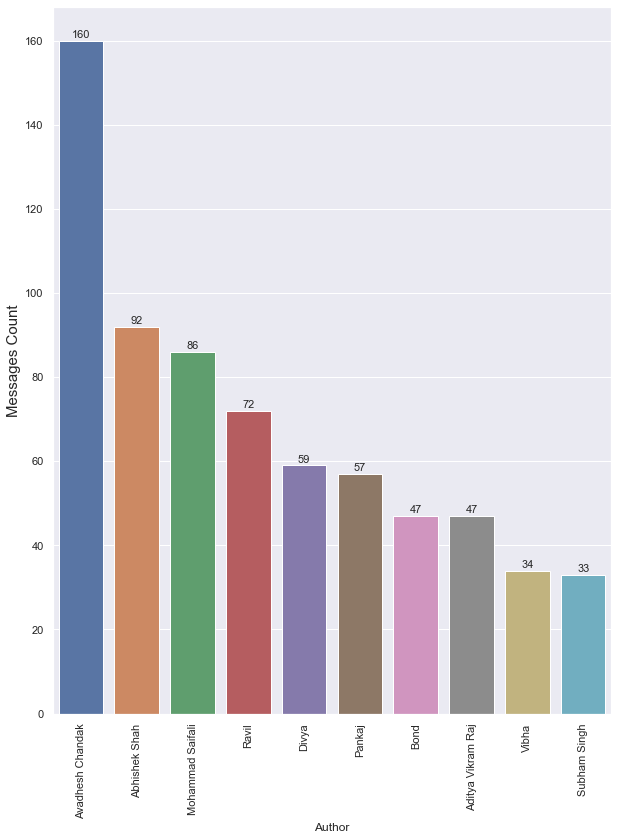

In [59]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 13))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Author", data=df,order = df['Author'].value_counts().iloc[:10].index)
ax.set_ylabel('Messages Count', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

(-0.5, 499.5, 599.5, -0.5)

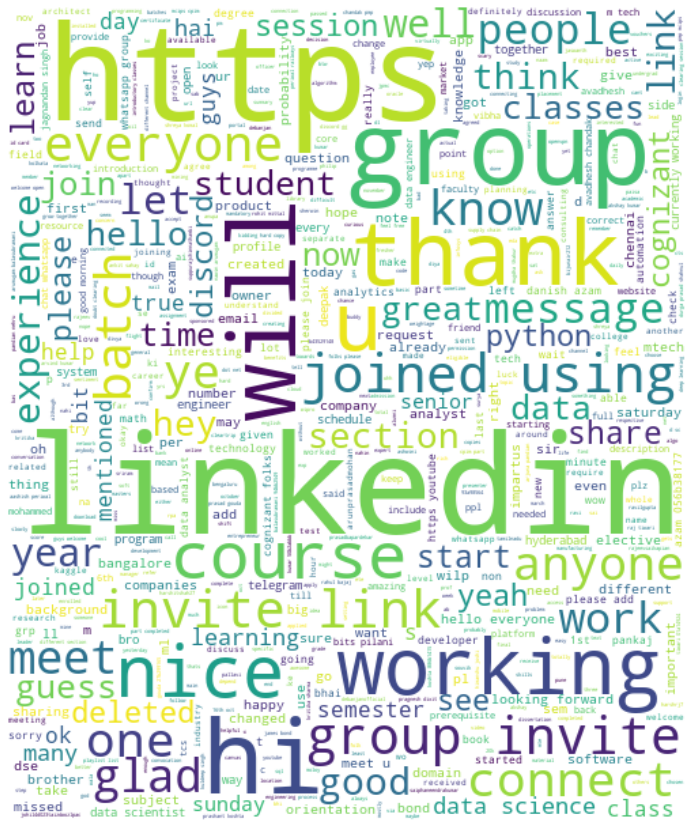

In [60]:
text = df['Message'].tolist() 
text = ' '.join(text).lower()
stopwords = set(STOPWORDS)
stopwords.update(["file", "attached", "media", "omitted"])
words = WordCloud(background_color="white", 
               max_words=1000, 
               width=500, 
               height=600, 
               random_state=1,stopwords=stopwords).generate(text)

plt.figure(figsize=(15,15))
plt.imshow(words, interpolation='bilinear')
plt.axis("off")